In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
swing_df = pd.read_csv('trackman.csv')
swing_df.head()

,PitcherThrows,BatterSide,Outs,Balls,Strikes,AutoPitchType,PitchCall,TaggedHitType,PlayResult,OutsOnPlay,...,League,AutoHitType,HitSpinAxis,HitType,HitDir,hx,hy,AngleCats,exitVeloCats,InKZone
0,Right,Right,0,0,0,Sinker,InPlay,GroundBall,Out,1,...,BW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES
1,Right,Right,1,1,0,Sinker,InPlay,FlyBall,Out,1,...,BW,FlyBall,215.204047,FlyBall,Right,171.175482,256.272677,> 30,95-105,YES
2,Right,Left,0,2,2,Four-Seam,InPlay,LineDrive,Out,2,...,BW,LineDrive,324.642845,LowLineDrive,Center,38.118308,162.119080,10-20 (w/ 10),95-105,YES
3,Right,Right,2,1,0,Four-Seam,InPlay,GroundBall,Single,0,...,BW,GroundBall,NaN,GroundBall,Left,-10.165228,18.390056,< 10,85-95,YES
4,Right,Right,1,1,2,Four-Seam,InPlay,GroundBall,Out,1,...,BW,GroundBall,NaN,GroundBall,Center,0.947038,10.340031,< 10,85-95,YES


In [3]:
swing_df.dtypes

PitcherThrows      object
BatterSide         object
Outs                int64
Balls               int64
Strikes             int64
AutoPitchType      object
PitchCall          object
TaggedHitType      object
PlayResult         object
OutsOnPlay          int64
PlateLocHeight    float64
PlateLocSide      float64
ExitSpeed         float64
Angle             float64
Direction         float64
HitSpinRate       float64
Distance          float64
Bearing           float64
HangTime          float64
Level              object
League             object
AutoHitType        object
HitSpinAxis       float64
HitType            object
HitDir             object
hx                float64
hy                float64
AngleCats          object
exitVeloCats       object
InKZone            object
dtype: object

In [4]:
swing_df.isna().sum()

PitcherThrows         0
BatterSide            0
Outs                  0
Balls                 0
Strikes               0
AutoPitchType      2311
PitchCall             0
TaggedHitType         0
PlayResult            0
OutsOnPlay            0
PlateLocHeight      973
PlateLocSide        973
ExitSpeed          9245
Angle              9245
Direction          9245
HitSpinRate       65689
Distance          19862
Bearing           19862
HangTime          19862
Level                 0
League                0
AutoHitType       19862
HitSpinAxis       43855
HitType            9245
HitDir            19862
hx                19862
hy                19862
AngleCats          9245
exitVeloCats       9245
InKZone             973
dtype: int64

In [5]:
swing_df.shape

(158978, 30)

In [6]:
swing_df = swing_df.dropna()
swing_df.head(5)

,PitcherThrows,BatterSide,Outs,Balls,Strikes,AutoPitchType,PitchCall,TaggedHitType,PlayResult,OutsOnPlay,...,League,AutoHitType,HitSpinAxis,HitType,HitDir,hx,hy,AngleCats,exitVeloCats,InKZone
1,Right,Right,1,1,0,Sinker,InPlay,FlyBall,Out,1,...,BW,FlyBall,215.204047,FlyBall,Right,171.175482,256.272677,> 30,95-105,YES
2,Right,Left,0,2,2,Four-Seam,InPlay,LineDrive,Out,2,...,BW,LineDrive,324.642845,LowLineDrive,Center,38.118308,162.119080,10-20 (w/ 10),95-105,YES
6,Right,Left,2,1,0,Four-Seam,InPlay,LineDrive,Single,0,...,BW,LineDrive,133.723058,LowLineDrive,Center,-43.601629,254.362309,10-20 (w/ 10),95-105,YES
7,Right,Right,2,1,1,Four-Seam,InPlay,FlyBall,Out,1,...,BW,FlyBall,157.105081,FlyBall,Left,-159.973744,258.543379,20-30 (w/ 20),95-105,YES
11,Right,Right,1,0,0,Curveball,InPlay,GroundBall,Single,0,...,BW,GroundBall,256.551591,GroundBall,Center,20.520868,81.405420,< 10,95-105,YES


In [7]:
swing_df["PlayResult"].value_counts()

Out               38516
Single            22764
Double             6995
HomeRun            5057
Sacrifice          2317
Error               926
Triple              905
FieldersChoice      827
Fielderschoice        4
Undefined             2
FlyBall               1
Name: PlayResult, dtype: int64

In [8]:
my_dict = {'FlyBall':'Out','Sacrifice':'Out','Error':'Out', 'FieldersChoice': 'Out', 'Fielderschoice':'Out', 'Homerun' : "HomeRun", "GroundBall" : "Out", "Popup" : "Out"}

In [9]:
swing_df["PlayResult"] = swing_df.PlayResult.replace(my_dict, regex = True)

In [10]:
swing_df["PlayResult"].value_counts()

Out          42591
Single       22764
Double        6995
HomeRun       5057
Triple         905
Undefined        2
Name: PlayResult, dtype: int64

In [11]:
swing_df = swing_df[swing_df["PlayResult"].str.contains("Undefined")==False]

In [12]:
swing_df["PlayResult"].value_counts()

Out        42591
Single     22764
Double      6995
HomeRun     5057
Triple       905
Name: PlayResult, dtype: int64

In [13]:
swing_df.shape

(78312, 30)

In [14]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [15]:
swing_df.dtypes

PitcherThrows      object
BatterSide         object
Outs                int64
Balls               int64
Strikes             int64
AutoPitchType      object
PitchCall          object
TaggedHitType      object
PlayResult         object
OutsOnPlay          int64
PlateLocHeight    float64
PlateLocSide      float64
ExitSpeed         float64
Angle             float64
Direction         float64
HitSpinRate       float64
Distance          float64
Bearing           float64
HangTime          float64
Level              object
League             object
AutoHitType        object
HitSpinAxis       float64
HitType            object
HitDir             object
hx                float64
hy                float64
AngleCats          object
exitVeloCats       object
InKZone            object
dtype: object

<AxesSubplot:>

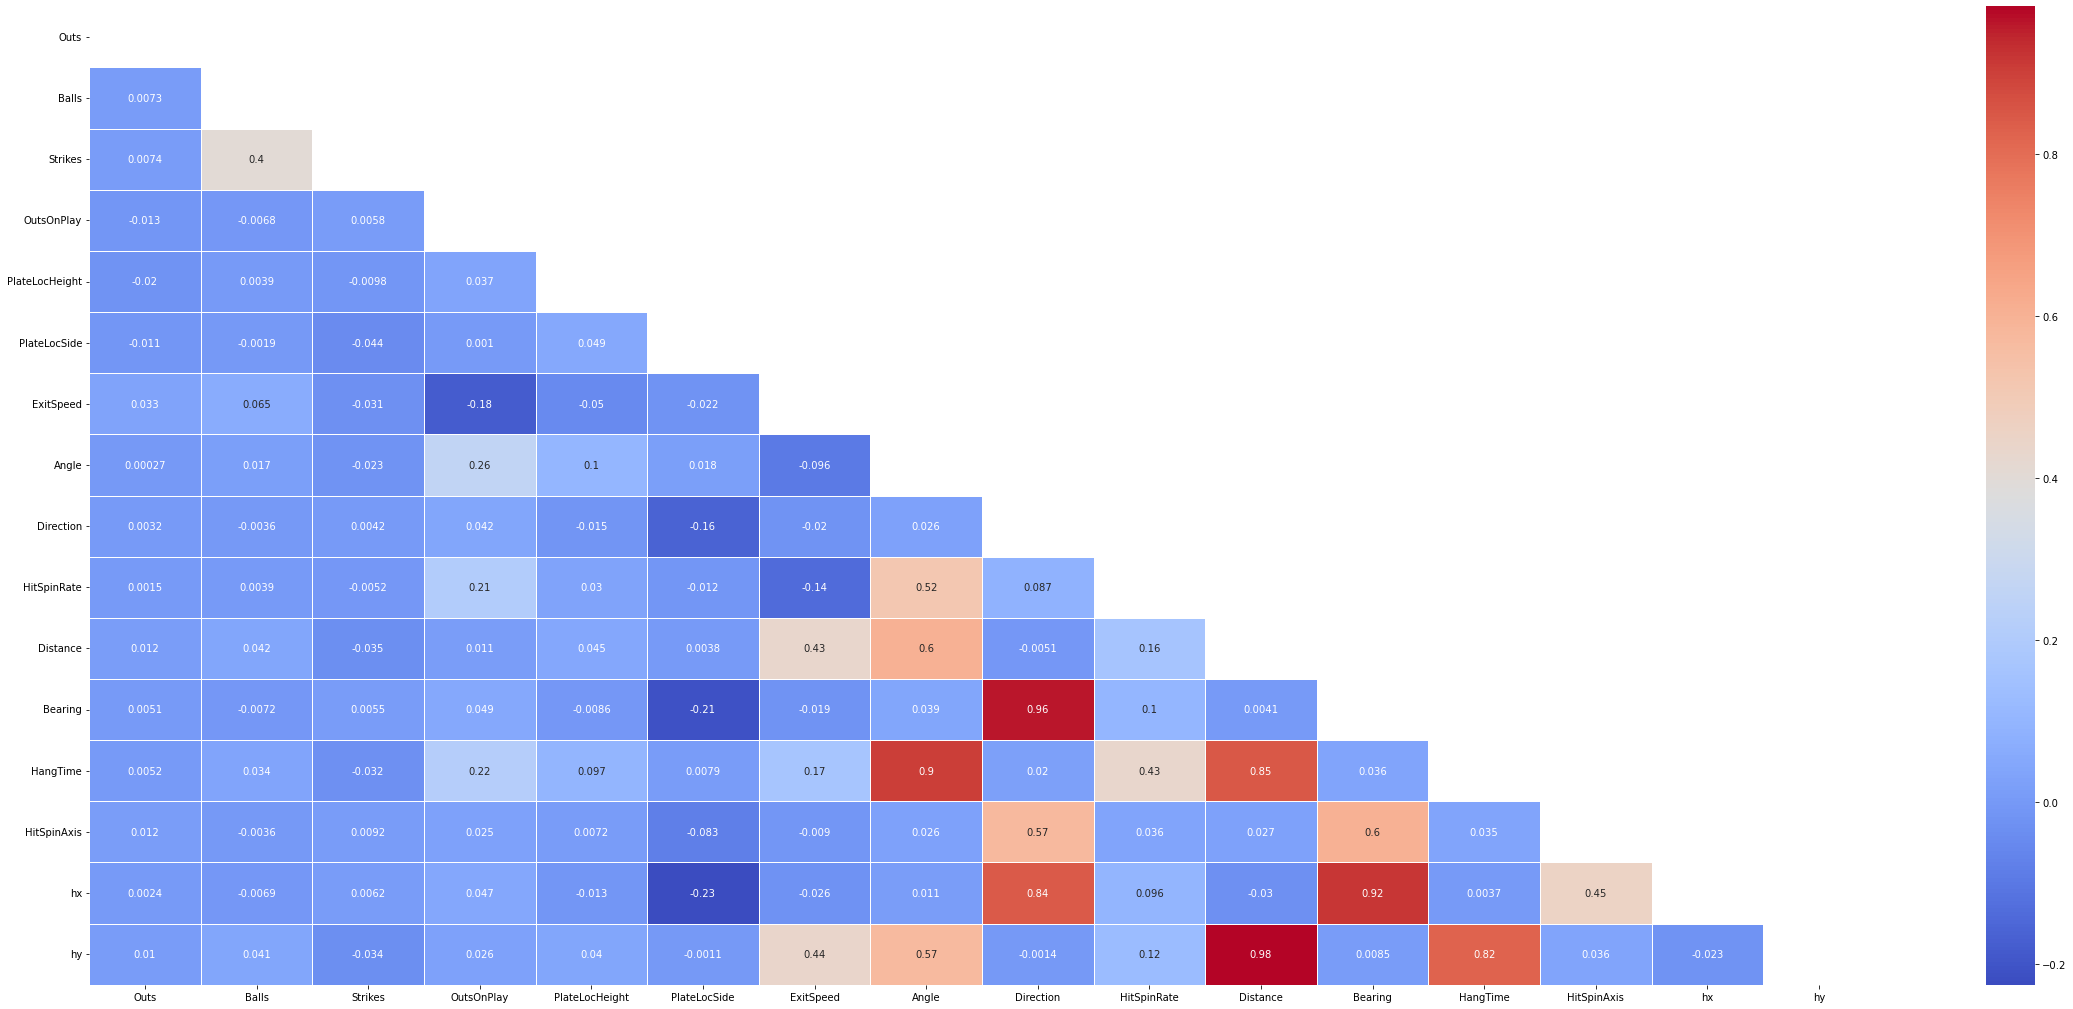

In [16]:
mask = np.zeros_like(swing_df.corr())
corr = swing_df.corr() 
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize =(40,18))
sns.heatmap(corr,mask = mask, annot=True,cmap='coolwarm', linewidth = .75)

<AxesSubplot:xlabel='ExitSpeed', ylabel='Angle'>

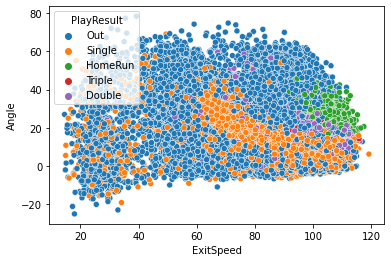

In [17]:
sns.scatterplot(x='ExitSpeed', y='Angle', hue='PlayResult', data=swing_df)

In [18]:
swing_df['PlayResult'].unique()

array(['Out', 'Single', 'HomeRun', 'Triple', 'Double'], dtype=object)

In [19]:
PlayResultNum = {'Out':0, 'Single':1, 'Double':2, 'Triple':3, 'HomeRun':4}

In [20]:
swing_df.replace({'PlayResult': PlayResultNum}, inplace=True)

In [21]:
swing_df

,PitcherThrows,BatterSide,Outs,Balls,Strikes,AutoPitchType,PitchCall,TaggedHitType,PlayResult,OutsOnPlay,...,League,AutoHitType,HitSpinAxis,HitType,HitDir,hx,hy,AngleCats,exitVeloCats,InKZone
1,Right,Right,1,1,0,Sinker,InPlay,FlyBall,0,1,...,BW,FlyBall,215.204047,FlyBall,Right,171.175482,256.272677,> 30,95-105,YES
2,Right,Left,0,2,2,Four-Seam,InPlay,LineDrive,0,2,...,BW,LineDrive,324.642845,LowLineDrive,Center,38.118308,162.119080,10-20 (w/ 10),95-105,YES
6,Right,Left,2,1,0,Four-Seam,InPlay,LineDrive,1,0,...,BW,LineDrive,133.723058,LowLineDrive,Center,-43.601629,254.362309,10-20 (w/ 10),95-105,YES
7,Right,Right,2,1,1,Four-Seam,InPlay,FlyBall,0,1,...,BW,FlyBall,157.105081,FlyBall,Left,-159.973744,258.543379,20-30 (w/ 20),95-105,YES
11,Right,Right,1,0,0,Curveball,InPlay,GroundBall,1,0,...,BW,GroundBall,256.551591,GroundBall,Center,20.520868,81.405420,< 10,95-105,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158972,Right,Right,2,1,1,Slider,InPlay,LineDrive,0,1,...,SEC,GroundBall,221.771630,LowLineDrive,Center,-3.613480,146.719139,10-20 (w/ 10),< 75,NO
158974,Left,Right,1,1,2,Slider,InPlay,FlyBall,0,1,...,SEC,FlyBall,200.169483,FlyBall,Center,32.997180,332.114169,> 30,85-95,YES
158975,Left,Left,2,1,1,Changeup,InPlay,LineDrive,0,1,...,SEC,LineDrive,222.220402,HighLineDrive,Right,160.040795,289.276850,10-20 (w/ 10),95-105,YES
158976,Right,Left,0,3,1,Sinker,InPlay,LineDrive,1,0,...,SEC,GroundBall,154.760470,LowLineDrive,Center,2.234452,208.571591,< 10,85-95,NO


In [22]:
X = swing_df[['PlayResult','Angle','ExitSpeed','Bearing','Direction','HangTime']]

In [23]:
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

<AxesSubplot:xlabel='0', ylabel='1'>

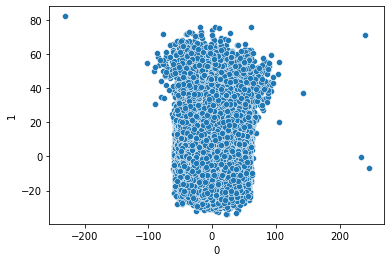

In [24]:
sns.scatterplot(x = pca_df[0], y = pca_df[1])

<AxesSubplot:xlabel='0', ylabel='1'>

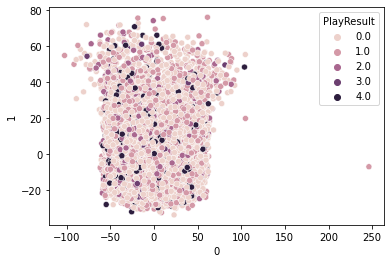

In [25]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=swing_df['PlayResult'])

In [26]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, 'Variance')

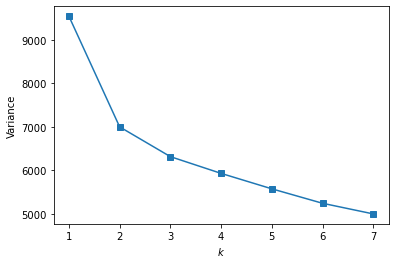

In [27]:
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [28]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

In [29]:
y = kmeans.fit_predict(X)

<AxesSubplot:xlabel='0', ylabel='1'>

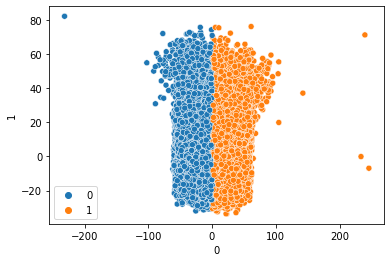

In [30]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

<AxesSubplot:xlabel='ExitSpeed', ylabel='Angle'>

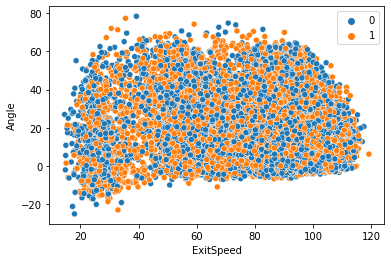

In [31]:
sns.scatterplot(x = swing_df['ExitSpeed'], y = swing_df['Angle'], hue=y)

In [32]:
y_df = pd.DataFrame(y, columns=['Cluster'])
new_df = pd.concat([swing_df, y_df], axis=1)
new_df

,PitcherThrows,BatterSide,Outs,Balls,Strikes,AutoPitchType,PitchCall,TaggedHitType,PlayResult,OutsOnPlay,...,AutoHitType,HitSpinAxis,HitType,HitDir,hx,hy,AngleCats,exitVeloCats,InKZone,Cluster
1,Right,Right,1.0,1.0,0.0,Sinker,InPlay,FlyBall,0.0,1.0,...,FlyBall,215.204047,FlyBall,Right,171.175482,256.272677,> 30,95-105,YES,1.0
2,Right,Left,0.0,2.0,2.0,Four-Seam,InPlay,LineDrive,0.0,2.0,...,LineDrive,324.642845,LowLineDrive,Center,38.118308,162.119080,10-20 (w/ 10),95-105,YES,0.0
6,Right,Left,2.0,1.0,0.0,Four-Seam,InPlay,LineDrive,1.0,0.0,...,LineDrive,133.723058,LowLineDrive,Center,-43.601629,254.362309,10-20 (w/ 10),95-105,YES,1.0
7,Right,Right,2.0,1.0,1.0,Four-Seam,InPlay,FlyBall,0.0,1.0,...,FlyBall,157.105081,FlyBall,Left,-159.973744,258.543379,20-30 (w/ 20),95-105,YES,0.0
11,Right,Right,1.0,0.0,0.0,Curveball,InPlay,GroundBall,1.0,0.0,...,GroundBall,256.551591,GroundBall,Center,20.520868,81.405420,< 10,95-105,YES,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
78302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
78306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
78308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [33]:
pca_df

,0,1
0,36.077784,6.445485
1,18.405837,-16.866532
2,-8.931082,-9.212649
3,-39.760248,-0.854377
4,19.612500,-18.807087
...,...,...
78307,-1.390963,6.571621
78308,4.817037,9.450265
78309,38.167835,-7.352019
78310,3.463084,-10.887849


In [34]:
import plotly.express as px

In [35]:
fig = px.scatter(pd.concat([new_df, pca_df], axis = 1), 
                 x = 0, y = 1, color='Cluster', hover_data=['Name','Type 1','Type 2','Legendary'])
fig.show()

ValueError: Value of 'hover_data_0' is not the name of a column in 'data_frame'. Expected one of ['PitcherThrows', 'BatterSide', 'Outs', 'Balls', 'Strikes', 'AutoPitchType', 'PitchCall', 'TaggedHitType', 'PlayResult', 'OutsOnPlay', 'PlateLocHeight', 'PlateLocSide', 'ExitSpeed', 'Angle', 'Direction', 'HitSpinRate', 'Distance', 'Bearing', 'HangTime', 'Level', 'League', 'AutoHitType', 'HitSpinAxis', 'HitType', 'HitDir', 'hx', 'hy', 'AngleCats', 'exitVeloCats', 'InKZone', 'Cluster', 0, 1] but received: Name